In [2]:
filename = 'output old minimumPercentage 12.csv'

In [3]:
import pandas as pd 
import seaborn as sns 
import numpy as np 
import re
import ast
from statistics import mean, geometric_mean
import matplotlib.pyplot as plt

In [4]:
def parseMeasurement(measurementAsString): 
    keys = ['scaler','estimator', 'generate_pandas_profiling_reports', 'process_preprocessed_data_of_uci', 'drop_correlated_features', 'drop_nan', 'encode_labels', 'minimumPercentageMissingToBeDropped',  'Execution time in seconds','AUC mean']
    result = {}
    # transform every element that is a primitiv object
    for element in keys: 
        result[element] = re.search(f'(?<={element}:, ).+?(?=\\n)',measurementAsString).group(0)
    # transform the oneHotEncoded features to a list by extracting the String from the measurement including its literals
    result['oneHotEncodedFeatures'] = ast.literal_eval(re.search(f'(?<=oneHotEncodedFeatures:, )\[.*?\]',measurementAsString).group(0).replace(';',', '))
    # transform the AUC features to a list by extracting the String from the measurement including its literals
    result['AUC'] = ast.literal_eval(re.search(f'(?<=AUC:, )\[.+?\]',measurementAsString).group(0).replace(';',', '))
    # transform the best_params to a dict by extracting the String from the measurement including its literals
    result['best_params'] = ast.literal_eval(re.search('(?<=best_params:, )\{.*?\}',measurementAsString).group(0).replace(';',', '))
    # transform the parameters to a dict by extracting the String from the measurement including its literals
    ## because not all types in the dict are nativly available from python encode these objects as strings they can be processed if needed.
    ### get the string
    temp_parameters = re.search('(?<=parameters:, )\{.*?\}',measurementAsString).group(0)
    ### encode range objects
    temp_parameters = re.sub(r'range(\(.*?\))',r"'range\1'",temp_parameters)
    #### encode np.arrays as strings
    temp_parameters = re.sub(r'array(\(.*?\))',r"'array\1'", temp_parameters)
    result['parameters'] = ast.literal_eval(temp_parameters.replace(';',', '))
    # get the precision
    result['precision'] = [float(element) for element in re.search('(?<=precision,).+?(?=\\n)',measurementAsString).group(0).split(',')[2].split(';')]
    result['recall'] = [float(element) for element in re.search('(?<=recall,).+?(?=\\n)',measurementAsString).group(0).split(',')[2].split(';')]
    result['f1-score'] = [float(element) for element in re.search('(?<=f1-score,).+?(?=\\n)',measurementAsString).group(0).split(',')[2].split(';')]

    return result

In [5]:
with open(filename) as file: 
    file_content = file.read()
    file_content = re.sub('\\n *(?=\\d)','',file_content)
    file_content = re.split('(?=scaler:)', file_content)
    measurements = [parseMeasurement(ele) for ele in file_content if not( re.match('\\n+', ele) or re.match('Skipping', ele))]

# Mean of different measurements shown as heatmap

<AxesSubplot:>

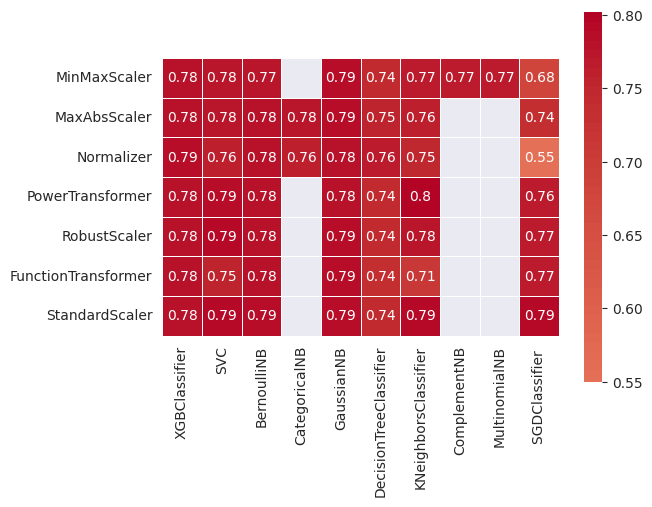

In [6]:
data = {}
for measurement in measurements:
    temp_dict = data.get(measurement['estimator'],{})
    temp_dict[measurement['scaler']] = mean(measurement['precision'])
    data[measurement['estimator']] = temp_dict
df = pd.DataFrame.from_dict(data)
df = df.apply(pd.to_numeric)
sns.heatmap(data=df, cmap="coolwarm", center=0, square=True, linewidths=.5, annot=True, vmin=0.55)

<AxesSubplot:>

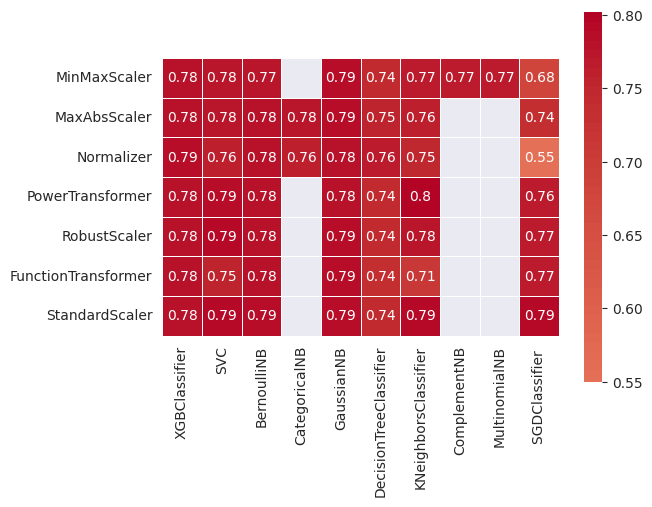

In [7]:
data = {}
for measurement in measurements:
    temp_dict = data.get(measurement['estimator'],{})
    temp_dict[measurement['scaler']] = mean(measurement['recall'])
    data[measurement['estimator']] = temp_dict
df = pd.DataFrame.from_dict(data)
df = df.apply(pd.to_numeric)
sns.heatmap(data=df, cmap="coolwarm", center=0, square=True, linewidths=.5, annot=True, vmin=0.55)

<AxesSubplot:>

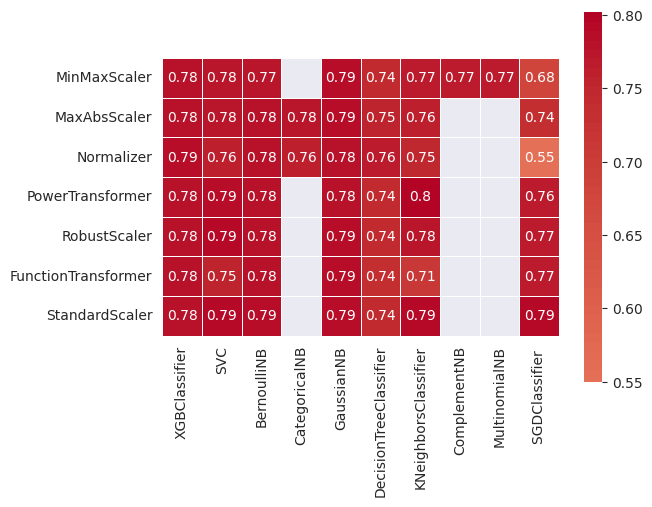

In [8]:
data = {}
for measurement in measurements:
    temp_dict = data.get(measurement['estimator'],{})
    temp_dict[measurement['scaler']] = mean(measurement['f1-score'])
    data[measurement['estimator']] = temp_dict
df = pd.DataFrame.from_dict(data)
df = df.apply(pd.to_numeric)
sns.heatmap(data=df, cmap="coolwarm", center=0, square=True, linewidths=.5, annot=True, vmin=0.55)

<AxesSubplot:>

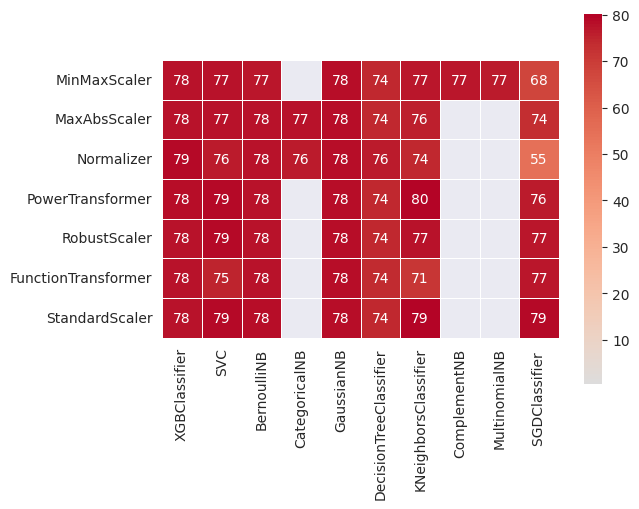

In [9]:
data = {}
for measurement in measurements:
    temp_dict = data.get(measurement['estimator'],{})
    temp_dict[measurement['scaler']] = measurement['AUC mean']
    data[measurement['estimator']] = temp_dict
df = pd.DataFrame.from_dict(data)
df = df.apply(pd.to_numeric)
sns.heatmap(data=df, cmap="coolwarm", center=0, square=True, linewidths=.5, annot=True, vmin=0.55)

In [15]:
data = {}
for measurement in measurements:
    temp_dict = data.get(measurement['estimator'],{})
    temp_dict[measurement['scaler']] = measurement['Execution time in seconds']/100
    data[measurement['estimator']] = temp_dict
df = pd.DataFrame.from_dict(data)
df = df.apply(pd.to_numeric)
sns.heatmap(data=df, cmap="coolwarm", center=0, square=True, linewidths=.5, annot=True, vmin=0.55)

TypeError: unsupported operand type(s) for /: 'str' and 'int'

# Distribution of precision shown as boxplot

In [11]:
data = []
for measurement in measurements:
    for precision in measurement['precision']:
        data.append([measurement['estimator'], measurement['scaler'], precision])
df = pd.DataFrame(data, columns =['estimator', 'scaler', 'precision'])

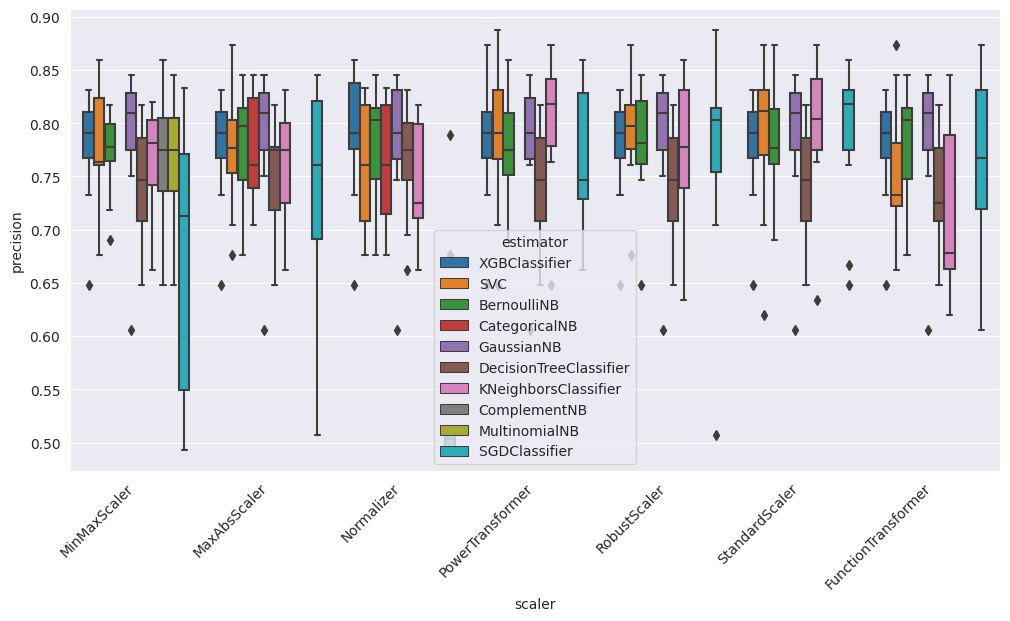

In [12]:
plt.figure(figsize=(12, 6))
chart = sns.boxplot(data=df, x= 'scaler', y= 'precision', hue='estimator')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

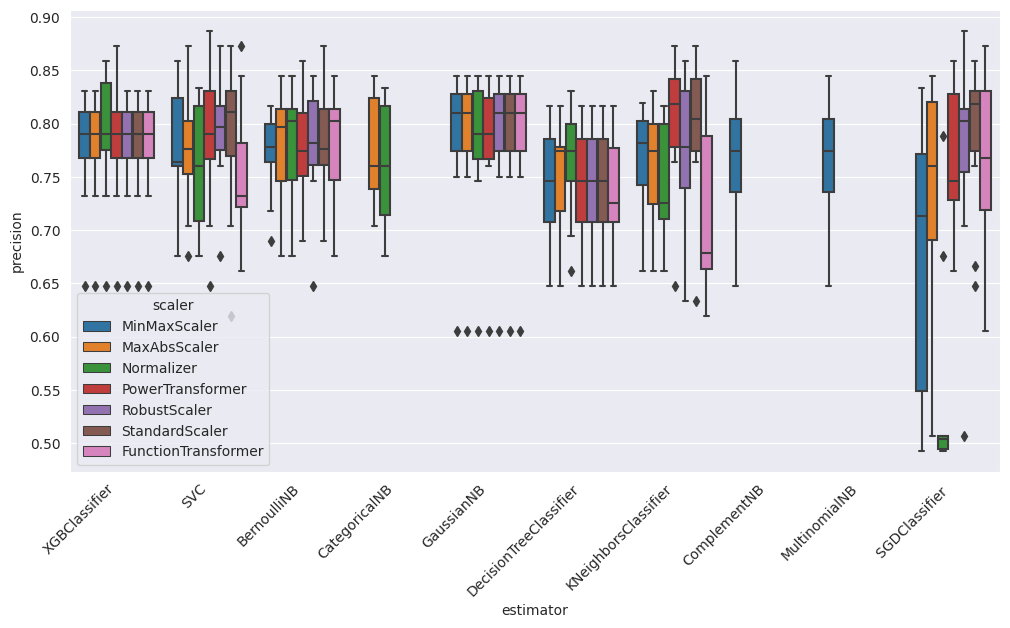

In [13]:
plt.figure(figsize=(12, 6))
chart = sns.boxplot(data=df, x= 'estimator', y= 'precision', hue='scaler')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

In [14]:
for measurement in measurements:


IndentationError: expected an indented block (2009486833.py, line 1)